In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [39]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


(None,
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 0  75.0        0                       582         0                 20   
 1  55.0        0                      7861         0                 38   
 2  65.0        0                       146         0                 20   
 3  50.0        1                       111         0                 20   
 4  65.0        1                       160         1                 20   
 
    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
 0                    1  265000.00               1.9           130    1   
 1                    0  263358.03               1.1           136    1   
 2                    0  162000.00               1.3           129    1   
 3                    0  210000.00               1.9           137    1   
 4                    0  327000.00               2.7           116    0   
 
    smoking  time  DEATH_EVENT  
 0        0     4            1  
 1        0     6

In [40]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [41]:
X = df.drop(columns=["DEATH_EVENT"])

# Menstandarkan dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mengkonversi kembali ke dataframe yang bisa dibaca 
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Menampilkan beberapa row dari data yang sudah discaled
X_scaled_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [42]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [43]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [44]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

In [45]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [46]:
# Evaluate Clustering
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

kmeans_davies = davies_bouldin_score(X_scaled, kmeans_labels)
hierarchical_davies = davies_bouldin_score(X_scaled, hierarchical_labels)
dbscan_davies = davies_bouldin_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1


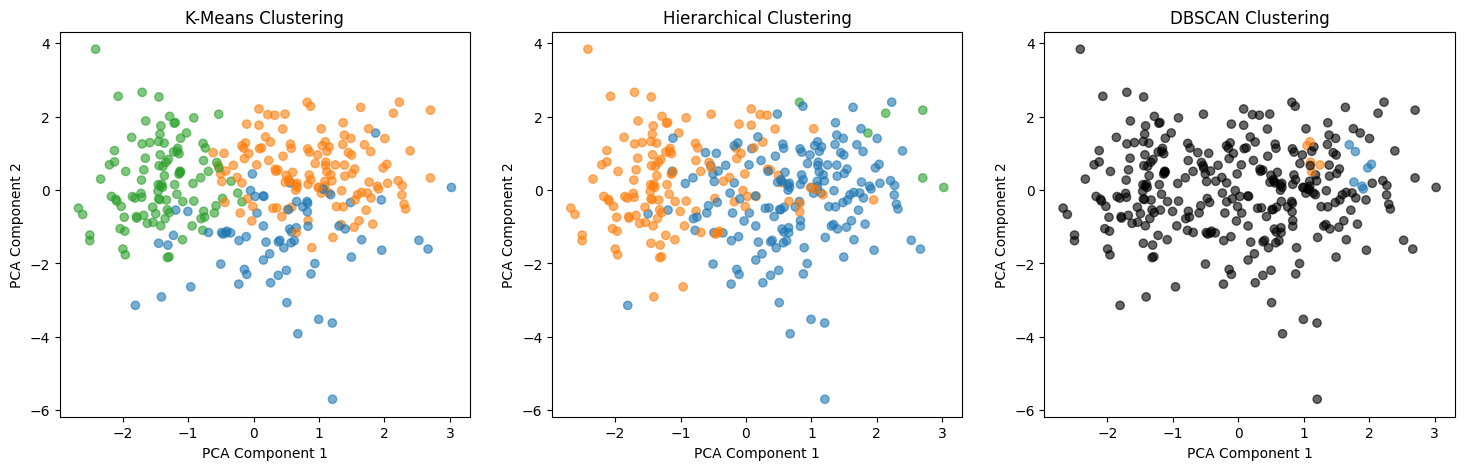

In [47]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
algorithms = ["K-Means", "Hierarchical", "DBSCAN"]
labels_list = [kmeans_labels, hierarchical_labels, dbscan_labels]
colors = sns.color_palette("tab10", 10)

for i, (algo, labels) in enumerate(zip(algorithms, labels_list)):
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=[colors[l] if l != -1 else 'black' for l in labels], alpha=0.6)
    axes[i].set_title(f"{algo} Clustering")
    axes[i].set_xlabel("PCA Component 1")
    axes[i].set_ylabel("PCA Component 2")

plt.show()


In [48]:
# Display Evaluation Scores
{
    "K-Means": {"Silhouette Score": kmeans_silhouette, "Davies-Bouldin Index": kmeans_davies},
    "Hierarchical": {"Silhouette Score": hierarchical_silhouette, "Davies-Bouldin Index": hierarchical_davies},
    "DBSCAN": {"Silhouette Score": dbscan_silhouette, "Davies-Bouldin Index": dbscan_davies}
}

{'K-Means': {'Silhouette Score': 0.10529706940384334,
  'Davies-Bouldin Index': 2.603840464508996},
 'Hierarchical': {'Silhouette Score': 0.0987625574658745,
  'Davies-Bouldin Index': 2.3796543341135363},
 'DBSCAN': {'Silhouette Score': -0.1222887670043279,
  'Davies-Bouldin Index': 1.6715294977565838}}